## Assignment 2: Fashion MNIST
Now it is your turn! You are going to use the same methods presented in the previous video in order to classify clothes from a black and white dataset of images (image by Zalando, MIT License):
![](https://tensorflow.org/images/fashion-mnist-sprite.png)

The class labels are:
```
0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot
```

### 1. Preparing the input data
Let's first import the dataset. It is available on [keras.datasets](https://keras.io/datasets/):

In [1]:
import keras
fashion_mnist = keras.datasets.fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

/Users/wittmann/anaconda/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
print("Shape of the training set: {}".format(X_train.shape))
print("Shape of the test set: {}".format(X_test.shape))

Shape of the training set: (60000, 28, 28)
Shape of the test set: (10000, 28, 28)


In [3]:
def normalize(x,m,s):
    return (x-m)/s

In [5]:
# TODO: Assign the mean and std of the training set to train_mean and train_std
train_mean = X_train.mean()
train_std = X_train.std()

print(f'Training Mean {train_mean}')
print(f'Training Std {train_std}')

Training Mean 72.94035223214286
Training Std 90.02118235130519


In [6]:
# Normalize the training and testing set using standardization
X_train = normalize(X_train, train_mean, train_std)
X_test = normalize(X_test, train_mean, train_std)

In [7]:
print(f'Training Mean after standardization {X_train.mean():.3f}')
print(f'Training Std after standardization {X_train.std():.3f}')
print(f'Test Mean after standardization {X_test.mean():.3f}')
print(f'Test Std after standardization {X_test.std():.3f}')

Training Mean after standardization -0.000
Training Std after standardization 1.000
Test Mean after standardization 0.002
Test Std after standardization 0.998


### Training with fully connected layers

In [14]:
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential([
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 18s 294us/step - loss: 0.4478 - acc: 0.8400 - val_loss: 0.4059 - val_acc: 0.8552
Epoch 2/2
60000/60000 [==============================] - 17s 285us/step - loss: 0.3490 - acc: 0.8724 - val_loss: 0.4053 - val_acc: 0.8533


### 3. Extending to CNNs
Now your goal is to develop an architecture that can reach a test accuracy higher than 0.85.

In [15]:
# TODO: Reshape the dataset in order to add the channel dimension
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [18]:
from keras.layers import Conv2D, MaxPooling2D

model = Sequential([
    Conv2D(6, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=3, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 32s 541us/step - loss: 0.4022 - acc: 0.8549 - val_loss: 0.3210 - val_acc: 0.8828
Epoch 2/3
60000/60000 [==============================] - 32s 526us/step - loss: 0.2798 - acc: 0.8975 - val_loss: 0.2983 - val_acc: 0.8901
Epoch 3/3
60000/60000 [==============================] - 31s 523us/step - loss: 0.2337 - acc: 0.9137 - val_loss: 0.2739 - val_acc: 0.9024


### 4. Visualizing Predictions

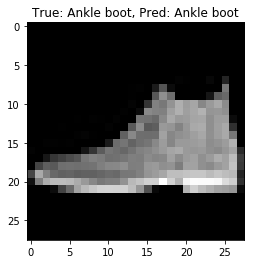

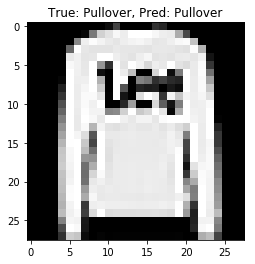

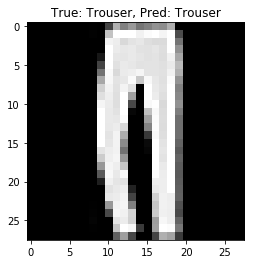

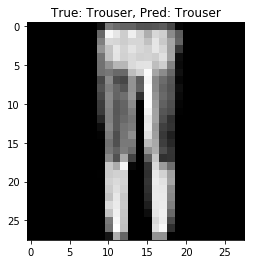

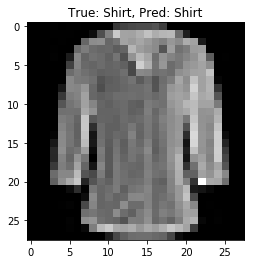

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

label_names = {0:"T-shirt/top",
               1:"Trouser",
               2:"Pullover",
               3:"Dress",
               4:"Coat",
               5:"Sandal",
               6:"Shirt",
               7:"Sneaker",
               8:"Bag",
               9:"Ankle boot"}

# Index to be visualized
for idx in range(5):
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    out = model.predict(X_test[idx].reshape(1,28,28,1))
    plt.title("True: {}, Pred: {}".format(label_names[y_test[idx]], label_names[np.argmax(out)]))
    plt.show()